In [1]:
import pandas as pd
import seaborn.objects as so

path = "../"

In [2]:
df = pd.read_csv(path + "output/Sales_P3/YTD Sales_P3.csv")

In [3]:
df.head(3)

,Version,Year,Month,Profit Ctr,RecordType,Cost Elem.,Account Class,Plnt,Product,Material Description,...,price_impact,price_impact_ratio,CM ratio,delta Sales,delta Sales Price,delta Sales Volume,delta Margin,delta Margin Price,delta Margin Volume,delta Margin Mix
0,Actual,2024,1,50803-010,B,M02001,NSE,NaN,NaN,NaN,...,-1.199740e+09,100.0,29.857676,-1.199740e+09,-1.199740e+09,0.0,-1.199740e+09,-1.199740e+09,0.0,0.0
1,Actual,2024,1,50803-010,B,M08001,NSE,180.0,A2C97214203,"SIM2K-305 DCT TL (U2) BRKT, 95442-2D700",...,-1.030000e+03,100.0,29.857676,-1.030000e+03,-1.030000e+03,0.0,-1.030000e+03,-1.030000e+03,0.0,0.0
2,Actual,2024,1,50803-010,B,M08001,NSE,180.0,A3C0872000001,TCU SIM2K 310 SU2b BRZ HMC 95440-2F010,...,4.066052e+08,100.0,29.857676,4.066052e+08,4.066052e+08,0.0,4.066052e+08,4.066052e+08,0.0,0.0


In [4]:
df.columns

Index(['Version', 'Year', 'Month', 'Profit Ctr', 'RecordType', 'Cost Elem.',
       'Account Class', 'Plnt', 'Product', 'Material Description',
       'Sold-to party', 'Sold-to Name 1', 'Qty', 'Sales_LC', 'STD_Costs',
       'Customer Center', 'G/L account name', 'Plant', 'Outlet', 'BU',
       'Division', 'Plant name', 'Outlet name', 'CM Cluster',
       'Customer Material', 'Material type', 'Product Hierarchy',
       'Standard Price', 'Ext. Matl. Group', 'PH_3 simple', 'PRD/MER',
       'mapping key', 'bud_price', 'act_price', 'price_diff', 'price_impact',
       'price_impact_ratio', 'CM ratio', 'delta Sales', 'delta Sales Price',
       'delta Sales Volume', 'delta Margin', 'delta Margin Price',
       'delta Margin Volume', 'delta Margin Mix'],
      dtype='object')

In [5]:
df = df.pivot_table(
    index=[
        "Version",
        "Profit Ctr",
        "Month",
        "Plant",
        "Outlet",
        "BU",
        "Division",
        "Plant name",
        "Outlet name",
        "RecordType",
        # "PH_3 simple",
    ],
    values=[
        "Qty",
        "Sales_LC",
        "delta Sales",
        "delta Sales Price",
        "delta Sales Volume",
        "delta Margin",
        "delta Margin Price",
        "delta Margin Volume",
        "delta Margin Mix",
    ],
    aggfunc="sum",
)
df = df.reset_index()

In [6]:
df["Month"] = df["Month"].astype("str")

In [7]:
df.head()

,Version,Profit Ctr,Month,Plant,Outlet,BU,Division,Plant name,Outlet name,RecordType,Qty,Sales_LC,delta Margin,delta Margin Mix,delta Margin Price,delta Margin Volume,delta Sales,delta Sales Price,delta Sales Volume
0,Actual,50802-018,1,219,7521,SC,P,Sejong,PL MES,F,35422.0,560391739.0,168823854.0,2.667617e+06,36455474.0,1.297008e+08,560391739.0,36455474.0,523936265.0
1,Actual,50802-018,2,219,7521,SC,P,Sejong,PL MES,F,38097.0,608574760.0,185435447.0,2.706300e+06,42628876.0,1.401003e+08,608574760.0,42628876.0,565945884.0
2,Actual,50802-018,3,219,7521,SC,P,Sejong,PL MES,F,53225.0,850338774.0,271317184.0,-6.349049e+06,89260914.0,1.884053e+08,850338774.0,89260914.0,761077860.0
3,Actual,50802-018,4,219,7521,SC,P,Sejong,PL MES,F,42088.0,671235743.0,163963045.0,-3.654497e+07,45641838.0,1.548662e+08,671235743.0,45641838.0,625593905.0
4,Actual,50803-009,1,242,7311,AC,P,ICH Icheon,PL EAC,F,47840.0,763816017.0,89303741.0,-1.026563e+08,12861974.0,1.790981e+08,763816017.0,12861974.0,750954043.0


## Monthly Sales

In [8]:
df_act = df[df["Version"] == "Actual"]

In [9]:
df_act = (
    df_act.groupby(["Outlet name", "Month"])
    .agg(
        {"Sales_LC": "sum"},
    )
    .reset_index()
)

In [10]:
df_act = df_act.sort_values(by=["Month", "Sales_LC"], ascending=False)

In [11]:
df_act.head()

,Outlet name,Month,Sales_LC
23,PL ENC,4,1.872287e+10
11,PL CM PSS,4,1.325008e+10
15,PL DTC,4,1.083138e+10
35,PL MTC,4,8.278384e+09
3,PL CM CCN,4,7.257866e+09


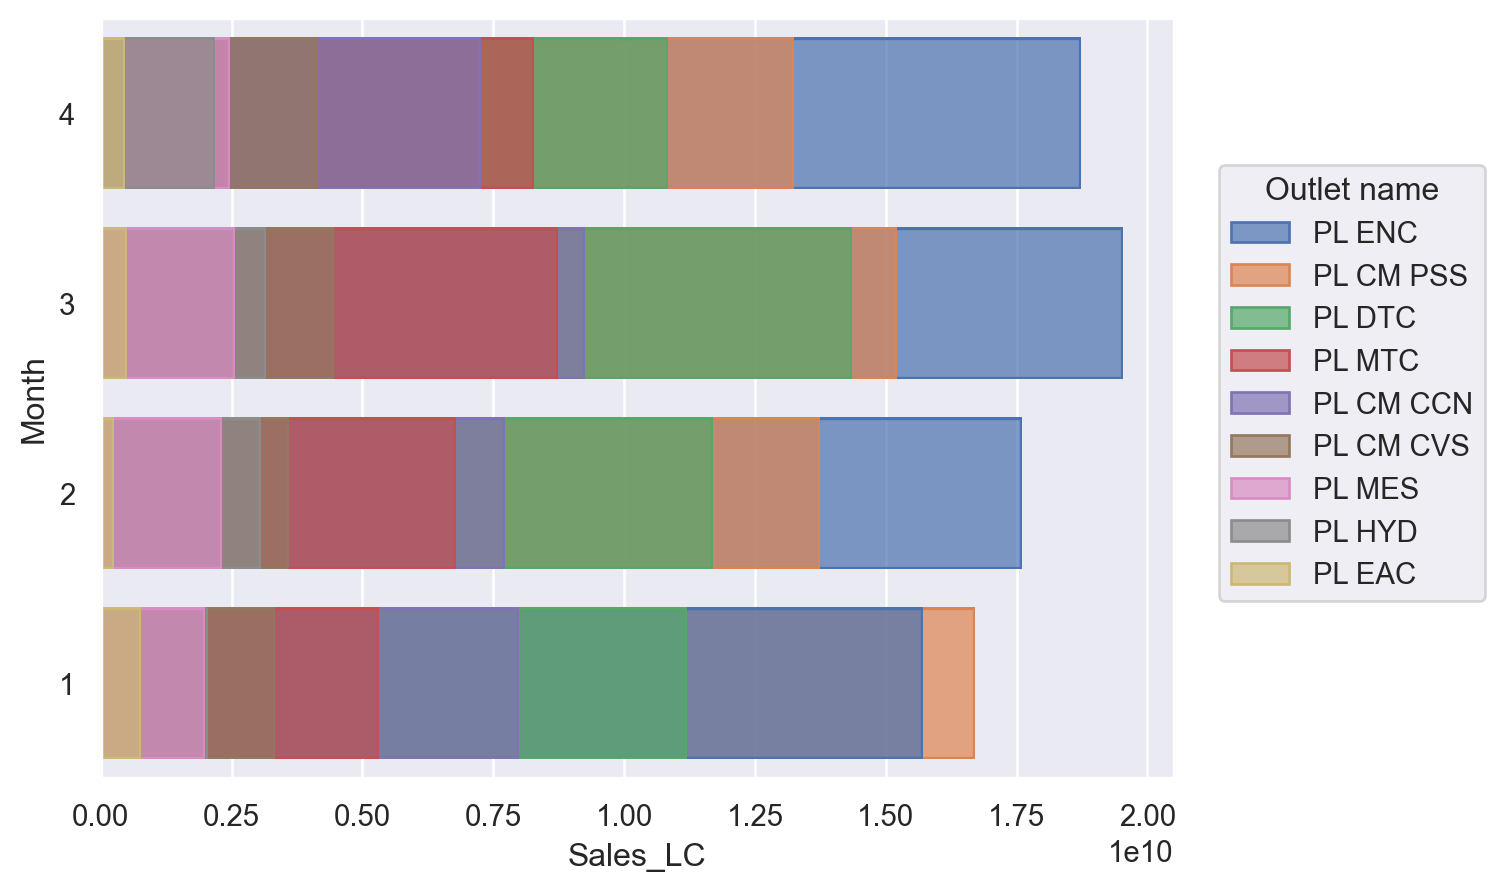

In [15]:
(
    so.Plot(df_act, x="Sales_LC", y="Month", color="Outlet name")
    .add(so.Bar())
)

## Delta Sales

In [17]:
delta_sales = (
    df.groupby(["Outlet name", "RecordType", ])
    .agg(
        {
            "delta Sales": "sum",
            "delta Sales Price": "sum",
            "delta Sales Volume": "sum",
        }
    )
    .reset_index()
)

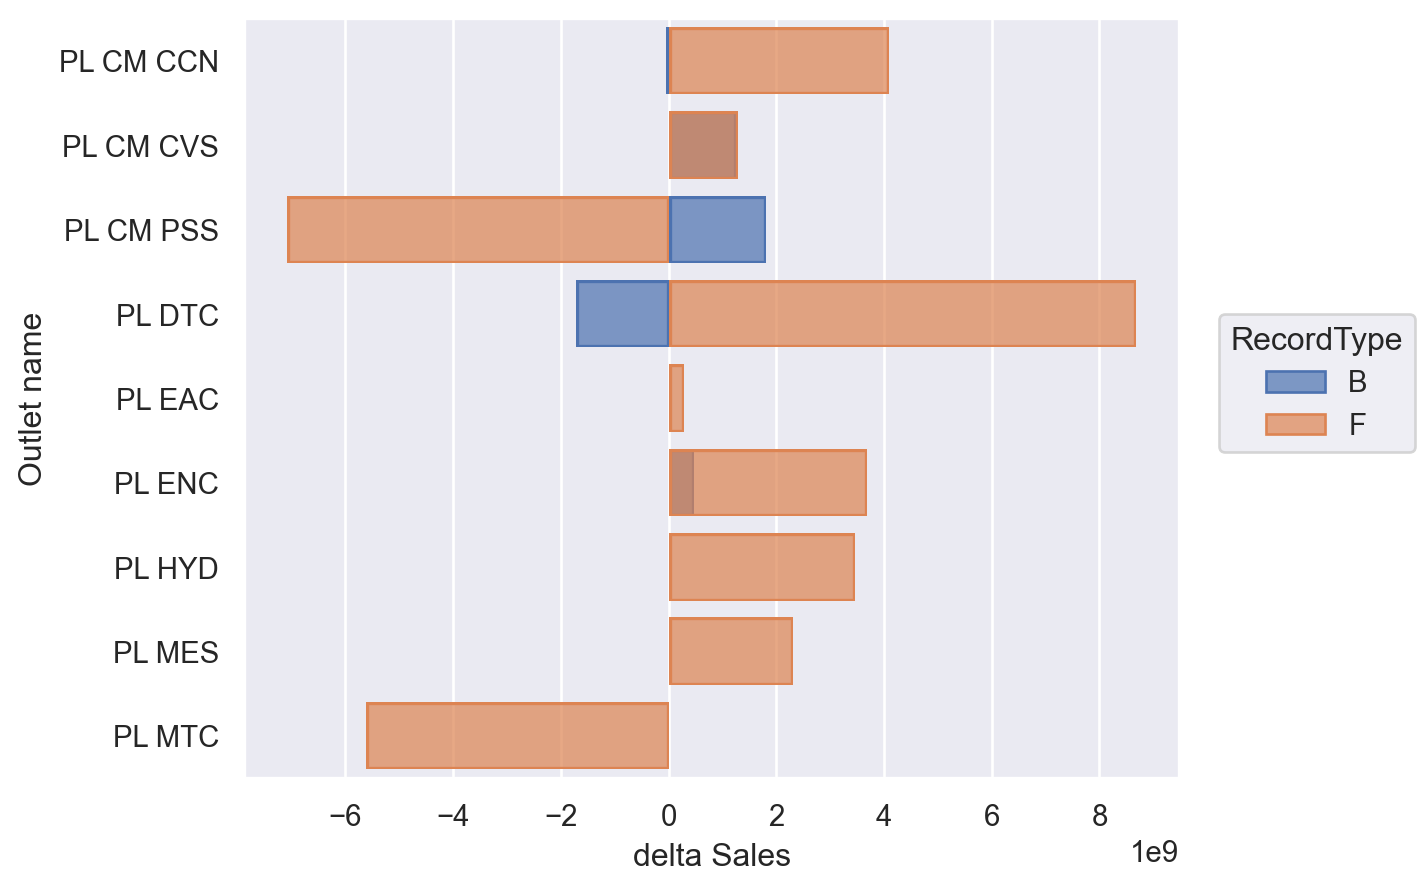

In [19]:
(
    so.Plot(delta_sales, x="delta Sales", y="Outlet name", color="RecordType")
    .add(so.Bar())
)

## Delta Sales Price

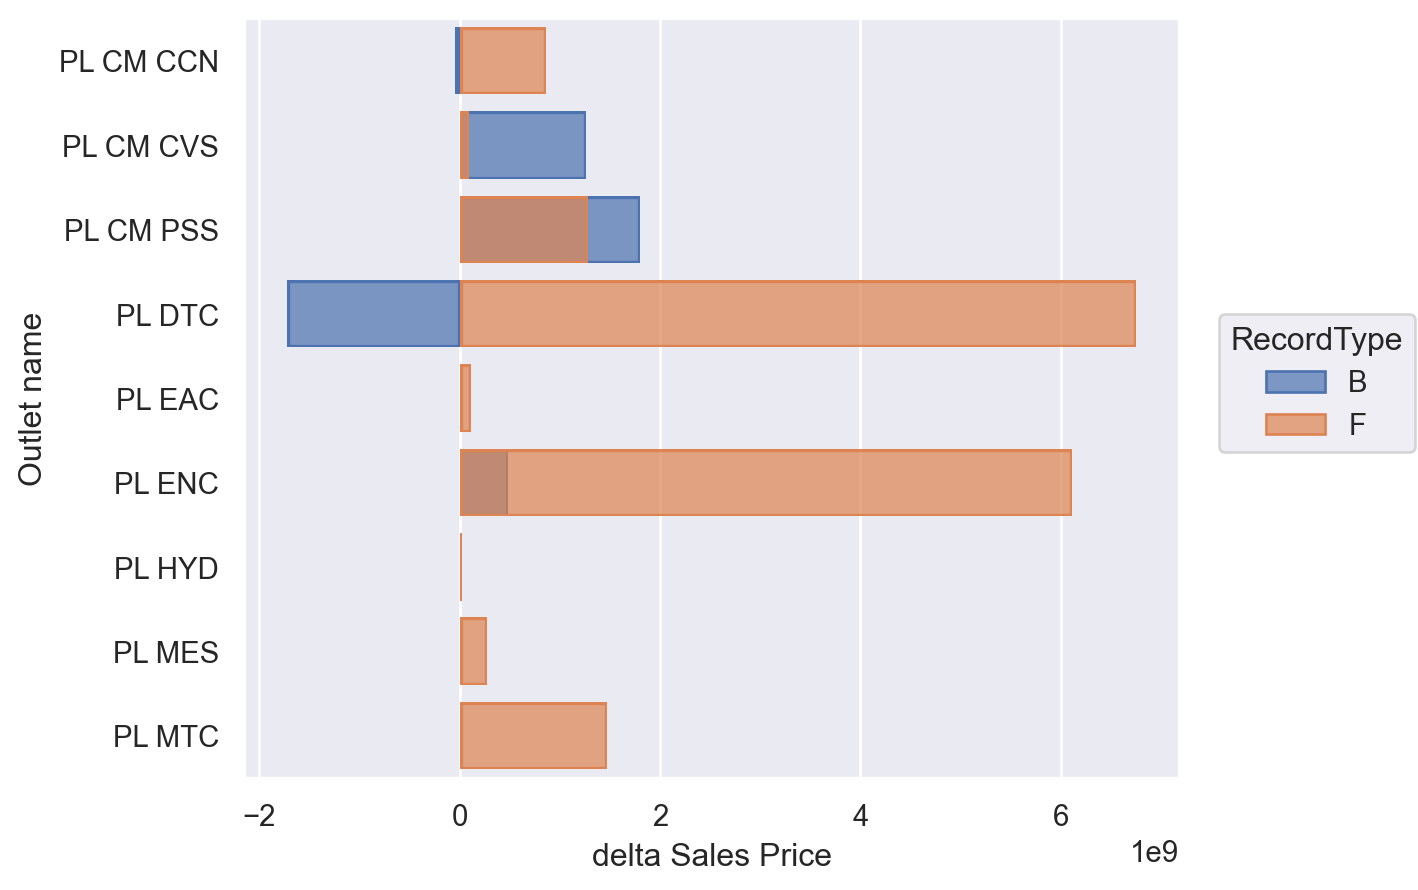

In [20]:
(
    so.Plot(delta_sales, x="delta Sales Price", y="Outlet name", color="RecordType")
    .add(so.Bar())
)

## Delta Sales Volume

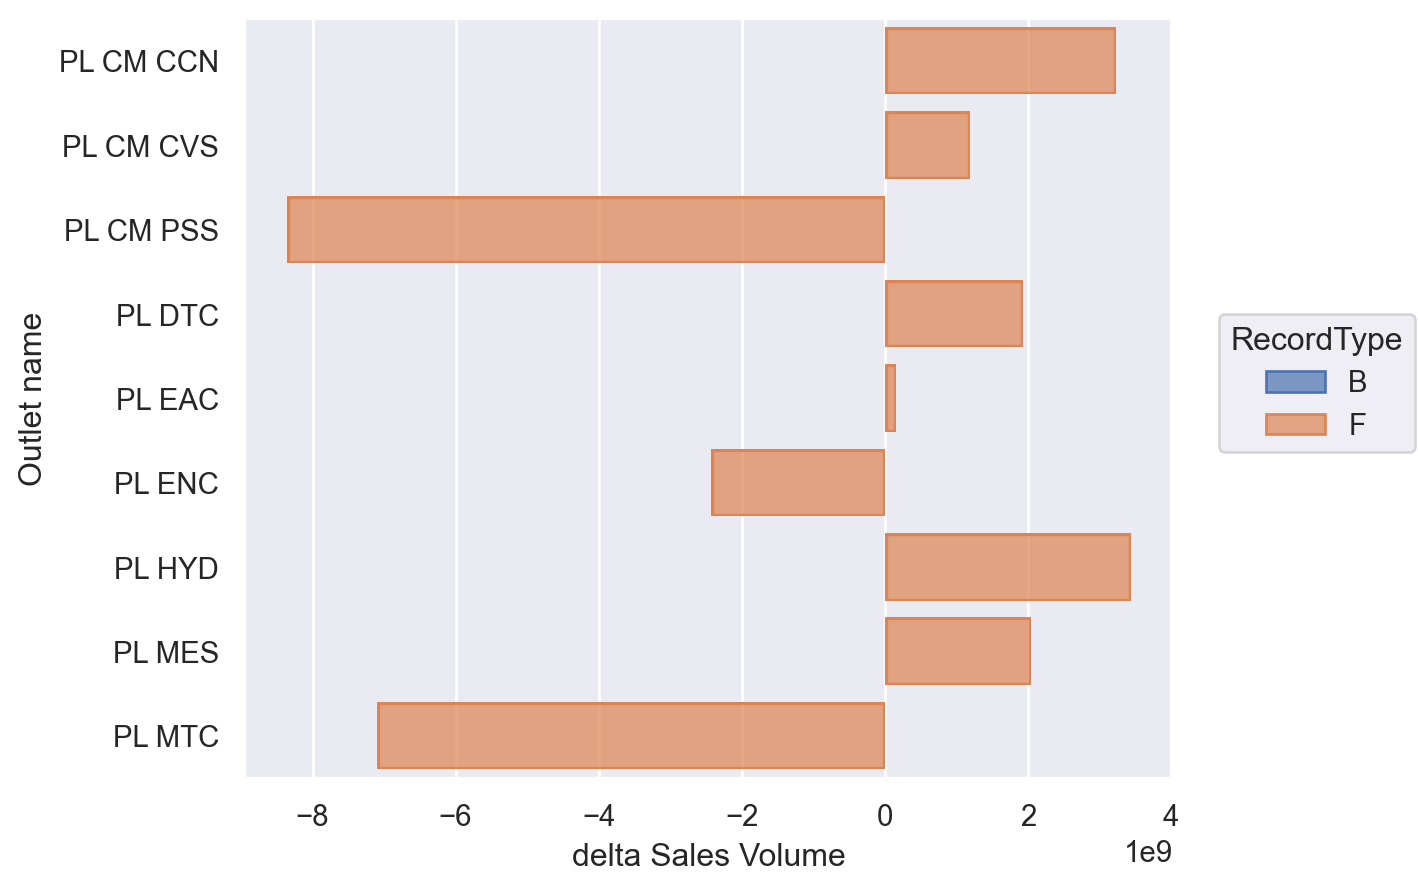

In [21]:
(
    so.Plot(delta_sales, x="delta Sales Volume", y="Outlet name", color="RecordType")
    .add(so.Bar())
)